In [125]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
import os
import time

In [98]:
pwd()

'C:\\Users\\Koushik'

In [99]:
dataset = pd.read_excel("Folds5x2_pp.xlsx") #load dataset
dataset.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [100]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
dataset.shape

(9568, 5)

1. 9568 Instances
2. 5 Variable
3. 4 Independent Variable (AT, V, AP, RH)
4. 1 Dependent Variable (PE)

Predict the Dependent Variable using ML and DL Techniques.

PE represents net hourly electrical energy output.

In [6]:
dataset.PE.describe()

count    9568.000000
mean      454.365009
std        17.066995
min       420.260000
25%       439.750000
50%       451.550000
75%       468.430000
max       495.760000
Name: PE, dtype: float64

In [ ]:
sns.countplot(dataset['PE'],label="Count")

In [ ]:
dataset.isnull().head()

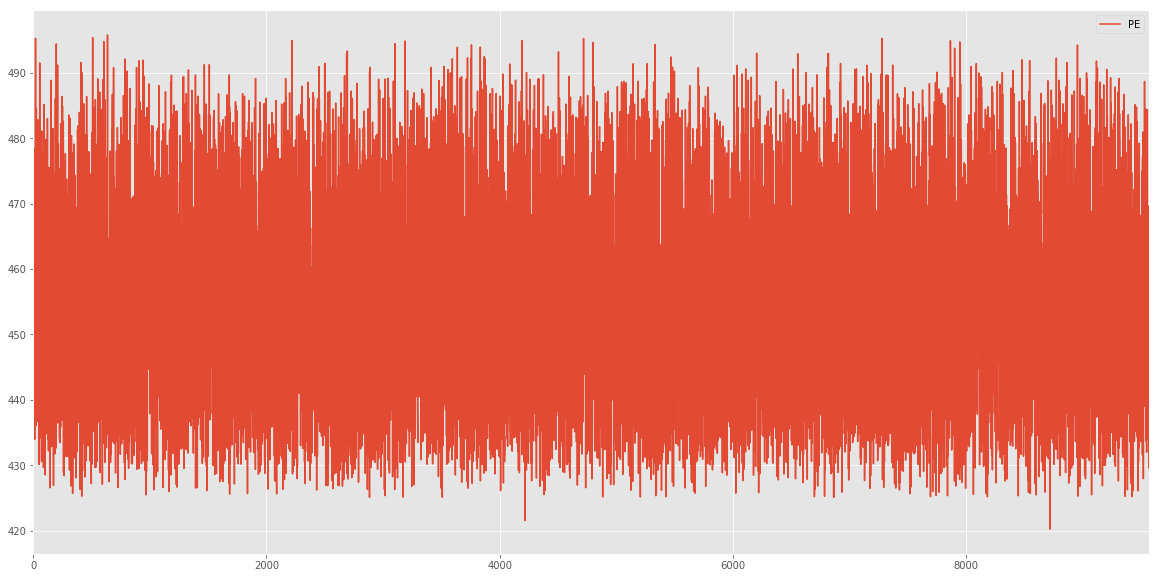

In [22]:
dataset.plot(y="PE",figsize=(20,10))

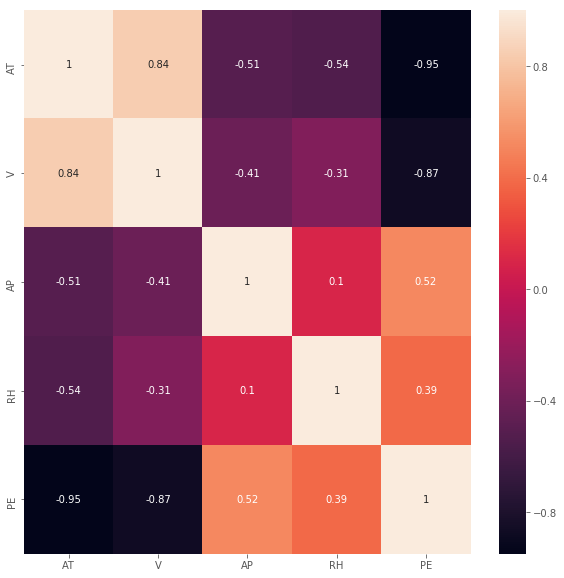

In [23]:
plt.figure(figsize  =(10,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

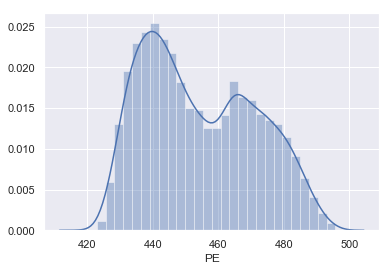

In [86]:
#sns.jointplot('AT', 'PE', data=dataset)
#sns.jointplot('V', 'PE', data=dataset)
#sns.jointplot('AP', 'PE', data=dataset)
#sns.jointplot('RH', 'PE', data=dataset)
sns.distplot(dataset.PE); 

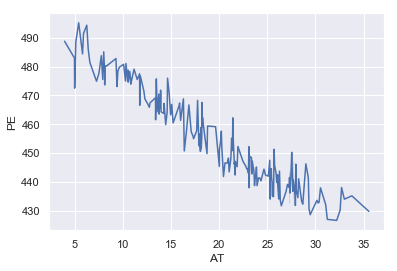

In [88]:
sns.lineplot('AT', 'PE', data=dataset[0:200])

<Figure size 800x640 with 0 Axes>

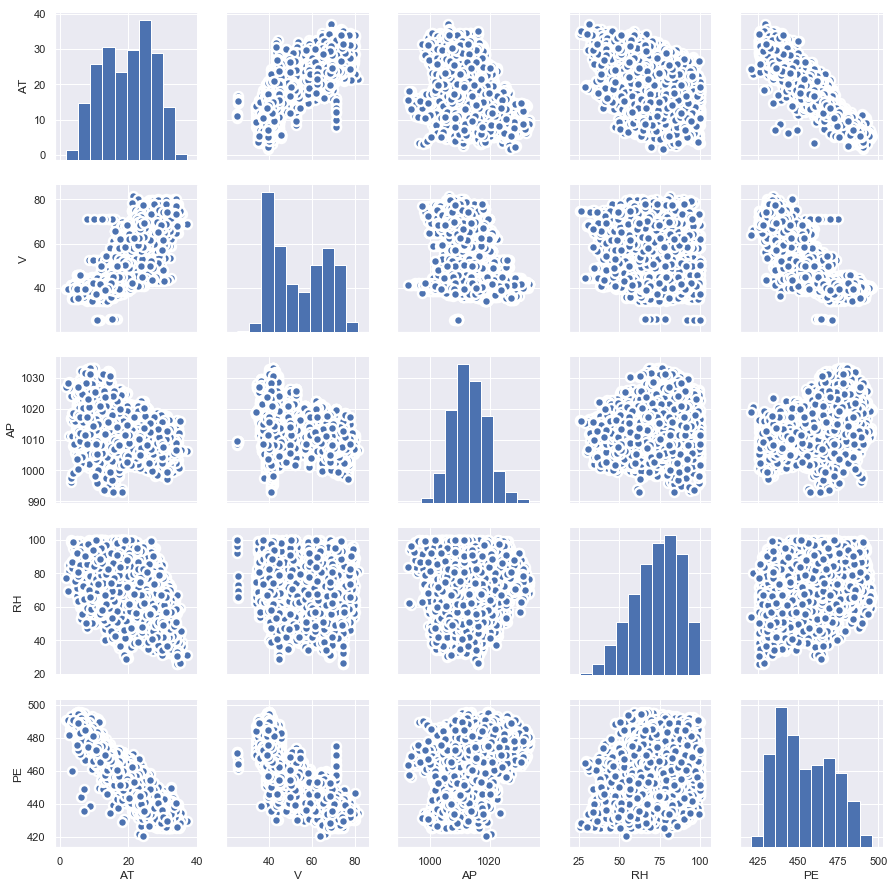

In [42]:
#Pairwise Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(dataset, plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

# Split using random splitting methods

In [101]:
msk = np.random.rand(len(dataset)) <= 0.7

train = dataset[msk]
test = dataset[~msk]

In [102]:
X_train = train[['AT','V','AP','RH']]
X_test = test[['AT','V','AP','RH']]

In [103]:
Y_train = train['PE']
Y_test = test['PE']

# Machine Learning

1. Linear Regression
2. Support Vector Machine
3. Random Forest
4. Gradient Boosting

In [19]:
#Linear Regression
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
Y_prediction_LR = LR.predict(X_test)

In [21]:
LR.score(X_test,Y_test)

0.9292230283819972

In [22]:
LR.score(X_train, Y_train)

0.9284155911563367

In [46]:
LR_compare = pd.DataFrame({'Actual Result': Y_test, 'Predicted Result': Y_prediction_LR})
LR_compare.head()

,Actual Result,Predicted Result
3,446.48,450.591231
4,473.90,471.818950
6,467.35,463.959379
9,477.50,472.991033
11,453.99,456.653789


In [24]:
LR_compare['Differences'] = abs(LR_compare['Actual Result'] - LR_compare['Predicted Result'])
LR_compare.head()

,Actual Result,Predicted Result,Differences
3,446.48,450.591231,4.111231
4,473.90,471.818950,2.081050
6,467.35,463.959379,3.390621
9,477.50,472.991033,4.508967
11,453.99,456.653789,2.663789


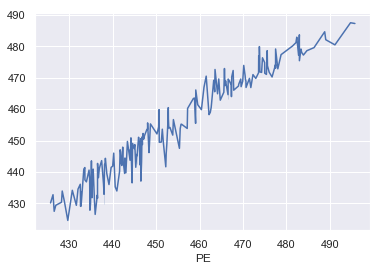

In [25]:
sns.lineplot(Y_test[0:200], Y_prediction_LR[0:200])

In [26]:
#Support Vector Machine
SVMachine = svm.SVR(kernel='rbf')
SVMachine.fit(X_train, Y_train)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
Y_prediction_SVM = SVMachine.predict(X_test)

In [28]:
SVMachine.score(X_test, Y_test)

0.3689022042657735

In [47]:
SVM_compare = pd.DataFrame({'Actual Result': Y_test, 'Predicted Result': Y_prediction_SVM})
SVM_compare.head()

,Actual Result,Predicted Result
3,446.48,450.447946
4,473.90,455.179784
6,467.35,457.739838
9,477.50,455.240345
11,453.99,454.021283


In [30]:
SVM_compare ['Differences'] = abs(SVM_compare ['Actual Result'] - SVM_compare ['Predicted Result'])
SVM_compare.head(10)

,Actual Result,Predicted Result,Differences
3,446.48,450.447946,3.967946
4,473.90,455.179784,18.720216
6,467.35,457.739838,9.610162
9,477.50,455.240345,22.259655
11,453.99,454.021283,0.031283
15,462.19,454.429350,7.760650
30,445.11,451.284656,6.174656
32,440.98,447.398510,6.418510
34,444.26,450.354881,6.094881
35,465.86,453.426888,12.433112


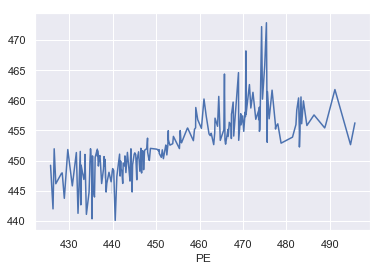

In [31]:
sns.lineplot(Y_test[0:200], Y_prediction_SVM[0:200])

In [32]:
#Random Forest
RF = RandomForestRegressor(n_estimators=1, max_depth=2, bootstrap=False, min_samples_leaf=1)

In [33]:
RF.fit(X_train, Y_train)
Y_prediction_RF = RF.predict(X_test)
RF.score(X_test,Y_test)
RF_Compare = pd.DataFrame({'Actual Result': Y_test, 'Predicted Result': Y_prediction_RF})
RF_Compare['Differences'] = abs(RF_Compare['Actual Result'] - RF_Compare['Predicted Result'])
RF_Compare.head()

,Actual Result,Predicted Result,Differences
3,446.48,451.487380,5.007380
4,473.90,479.379854,5.479854
6,467.35,465.587516,1.762484
9,477.50,479.379854,1.879854
11,453.99,451.487380,2.502620


In [34]:
RF.score(X_test,Y_test)

0.8549222435382855

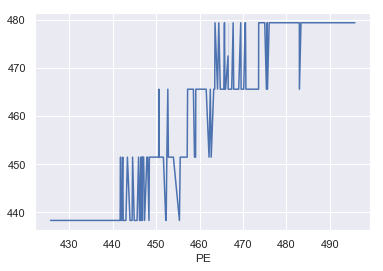

In [35]:
sns.lineplot(Y_test[0:200], Y_prediction_RF[0:200])

In [36]:
Y_prediction_RF

array([451.48738017, 479.37985366, 465.58751579, ..., 479.37985366,
       438.35245961, 465.58751579])

In [37]:
#Gradient Boosting
GB = GradientBoostingRegressor()

In [38]:
GB.fit(X_train, Y_train)
Y_prediction_GB = GB.predict(X_test)
GB.score(X_test,Y_test)

0.9494715589153359

In [39]:
#Compare
compare = pd.DataFrame({'Actual Result': Y_test, 'LR Prediction': Y_prediction_LR, 'SVM Prediction': Y_prediction_SVM, 'RF Prediction': Y_prediction_RF, 'GB Prediction': Y_prediction_GB,})
compare.head(10)

,Actual Result,LR Prediction,SVM Prediction,RF Prediction,GB Prediction
3,446.48,450.591231,450.447946,451.487380,448.040346
4,473.90,471.818950,455.179784,479.379854,473.506253
6,467.35,463.959379,457.739838,465.587516,462.730432
9,477.50,472.991033,455.240345,479.379854,473.512227
11,453.99,456.653789,454.021283,451.487380,456.080046
15,462.19,458.221101,454.429350,451.487380,458.557604
30,445.11,448.708908,451.284656,438.352460,445.734780
32,440.98,433.948306,447.398510,438.352460,435.452427
34,444.26,446.807106,450.354881,438.352460,444.432609
35,465.86,467.477666,453.426888,465.587516,468.141246


In [40]:
print('Linear Regression Accuracy: {:.4f}'.format(LR.score(X_test,Y_test)))
print('SVM Accuracy: {:.4f}'.format(SVMachine.score(X_test,Y_test)))
print('Random Forest Accuracy: {:.4f}'.format(RF.score(X_test,Y_test)))
print('Gradient Boostinf Accuracy: {:.4f}'.format(GB.score(X_test,Y_test)))

Linear Regression Accuracy: 0.9292
SVM Accuracy: 0.3689
Random Forest Accuracy: 0.8549
Gradient Boostinf Accuracy: 0.9495


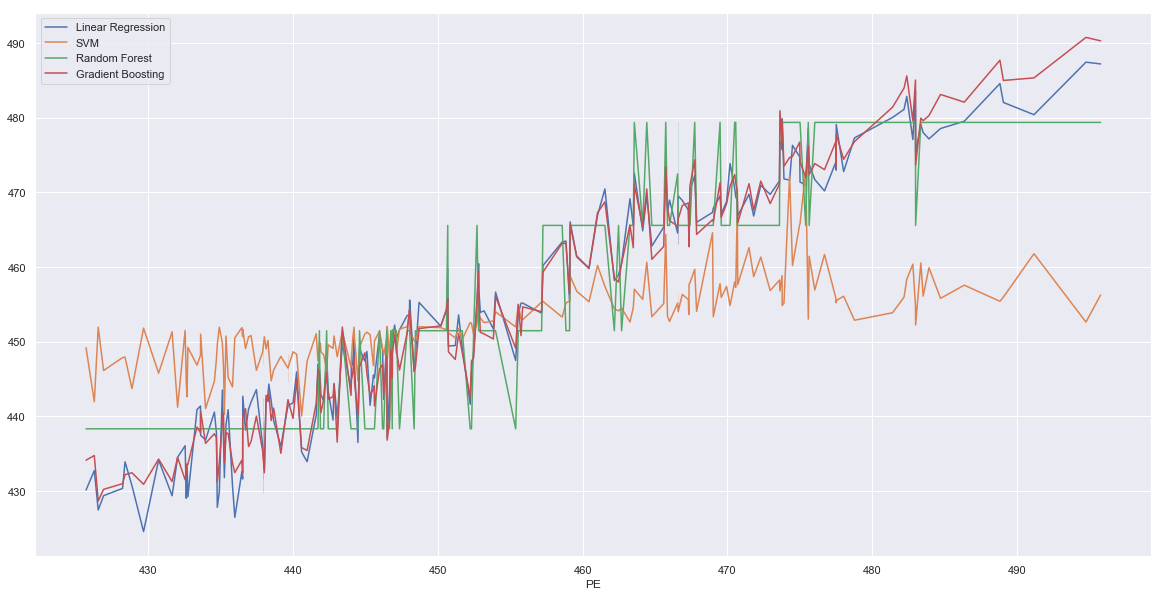

In [41]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(Y_test[0:200], Y_prediction_LR[0:200])
sns.lineplot(Y_test[0:200], Y_prediction_SVM[0:200])
sns.lineplot(Y_test[0:200], Y_prediction_RF[0:200])
sns.lineplot(Y_test[0:200], Y_prediction_GB[0:200])
plt.legend(["Linear Regression", "SVM", "Random Forest", "Gradient Boosting"])

Summary: If we compare the result, we can clearly reject the svm and random forest model, as both 
specifically svm provide lower accuracy. Both linear regression and gradient boosting offer more than 90%
precision, while gradient boosting is marginally better than linear regression. We can build our prediction 
system based on gradient boosting as well as we can also apply linear regression to build our prediction 
system because gradient boosting is slightly better than linear regression.

# Deep Learning: LSTM

In [111]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

1. Sequential model
2. 1 Input Layer
3. 1 Hidden Layer (16 neurons)
4. 1 Output Layer
5. relu Activation function
6. 200 epochs
7. 8 batch size

In [74]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_train_t, Y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
6650/6650 [==============================] - 6s 946us/step - loss: 50358.7208
Epoch 2/200
6650/6650 [==============================] - 4s 555us/step - loss: 454.8063
Epoch 3/200
6650/6650 [==============================] - 3s 521us/step - loss: 407.2272
Epoch 4/200
6650/6650 [==============================] - 4s 554us/step - loss: 344.3887
Epoch 5/200
6650/6650 [==============================] - 4s 565us/step - loss: 271.6490
Epoch 6/200
6650/6650 [==============================] - 4s 584us/step - loss: 198.7120
Epoch 7/200
6650/6650 [==============================] - 4s 631us/step - loss: 136.5240
Epoch 8/200
6650/6650 [==============================] - 4s 606us/step - loss: 91.3098
Epoch 9/200
6650/6650 [==============================] - 4s 533us/step - loss: 61.9392
Epoch 10/200
6650/6650 [==============================] - 4s 555us/step - loss: 44.1357
Epoch 11/200
6650/6650 [==============================] - 3s 497us/step - loss: 34.6741
Epoch 12/200
6650/6650 [========

6650/6650 [==============================] - 3s 492us/step - loss: 26.7404
Epoch 95/200
6650/6650 [==============================] - 3s 487us/step - loss: 26.7400
Epoch 96/200
6650/6650 [==============================] - 3s 496us/step - loss: 26.7396
Epoch 97/200
6650/6650 [==============================] - 3s 492us/step - loss: 26.7392
Epoch 98/200
6650/6650 [==============================] - 3s 483us/step - loss: 26.7388
Epoch 99/200
6650/6650 [==============================] - 3s 486us/step - loss: 26.7385
Epoch 100/200
6650/6650 [==============================] - 3s 496us/step - loss: 26.7381
Epoch 101/200
6650/6650 [==============================] - 3s 499us/step - loss: 26.7377
Epoch 102/200
6650/6650 [==============================] - 3s 501us/step - loss: 26.7373
Epoch 103/200
6650/6650 [==============================] - 3s 492us/step - loss: 26.7370
Epoch 104/200
6650/6650 [==============================] - 3s 520us/step - loss: 26.7366
Epoch 105/200
6650/6650 [===============

6650/6650 [==============================] - 3s 486us/step - loss: 26.7067
Epoch 187/200
6650/6650 [==============================] - 3s 484us/step - loss: 26.7063
Epoch 188/200
6650/6650 [==============================] - 3s 498us/step - loss: 26.7060
Epoch 189/200
6650/6650 [==============================] - 3s 523us/step - loss: 26.7056
Epoch 190/200
6650/6650 [==============================] - 3s 494us/step - loss: 26.7053
Epoch 191/200
6650/6650 [==============================] - 3s 510us/step - loss: 26.7049
Epoch 192/200
6650/6650 [==============================] - 3s 506us/step - loss: 26.7046
Epoch 193/200
6650/6650 [==============================] - 3s 497us/step - loss: 26.7042
Epoch 194/200
6650/6650 [==============================] - 3s 495us/step - loss: 26.7039
Epoch 195/200
6650/6650 [==============================] - 3s 493us/step - loss: 26.7035
Epoch 196/200
6650/6650 [==============================] - 3s 502us/step - loss: 26.7032
Epoch 197/200
6650/6650 [==========

In [75]:
Y_prediction_test = model_lstm.predict(X_test_t)
print("Score:\t{:0.4f}".format(r2_score(Y_test, Y_prediction_test)))
r2_test = r2_score(Y_test, Y_prediction_test)

Score:	0.9114


In [80]:
Y_prediction_test= model_lstm.predict(X_test_t)
Y_prediction_test

array([[450.21603],
       [470.0097 ],
       [464.23312],
       ...,
       [476.79083],
       [445.43625],
       [459.85193]], dtype=float32)

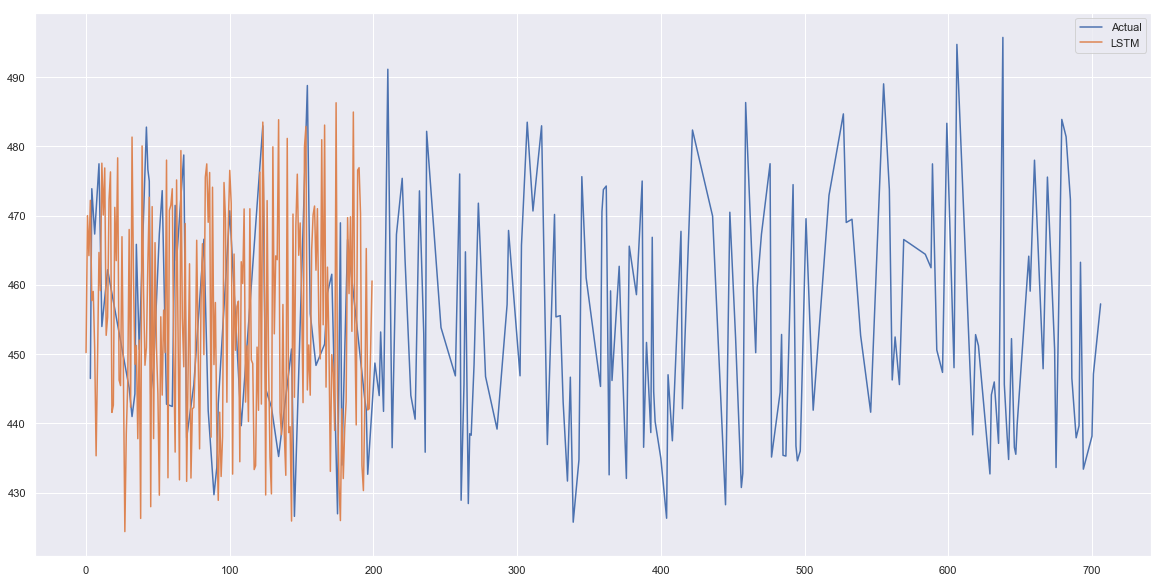

In [82]:
plt.plot(Y_test[0:200])
plt.plot(Y_prediction_test[0:200])
plt.legend(["Actual", "LSTM"])

If I compare the result of LSTM with Linear Regression and Gradient Boosting, we can see that 
Linear Repression and Gradient Boosting is somewhat better than LSTM

# Deep Learning: Updated LSTM

By applying the initial LSTM model, I get approximately 91% test accuracy. Now, by preprocessing the dataset, I try to improve the LSTM model as well as try to play around with the hidden layer, epoch and batch size. Finally , compare the update model to the initial model to check the weather it gives better or better results.